Project 1  
Titanic Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r"D:\python\Datasets\Titanic-Dataset.csv") # Load the Titanic dataset

In [3]:
df.head() # Display data from the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum() # Check for missing values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.Age.fillna(df.Age.mean(),inplace=True) # Fill missing values in the 'Age' column with the mean age

In [6]:
LE=LabelEncoder() # Convert categorical columns 'Sex' to numerical values

In [7]:
Gender=LE.fit_transform(df.Sex)
Gender

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [8]:
df.drop("Sex",axis=1,inplace=True) # Drop columns that are not required for the analysis
df["Gender"]=Gender
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,1


In [9]:
x=df[["Pclass","Age","Gender"]] # Split the data into features and target variable
x

,Pclass,Age,Gender
0,3,22.000000,1
1,1,38.000000,0
2,3,26.000000,0
3,1,35.000000,0
4,3,35.000000,1
...,...,...,...
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1


In [10]:
y=df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

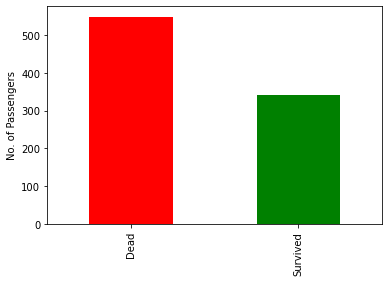

In [11]:
ax=y.value_counts().plot(kind="bar",color=["red","Green"])
ax.set_xticklabels(["Dead","Survived"])
ax.set(ylabel="No. of Passengers")
plt.show()

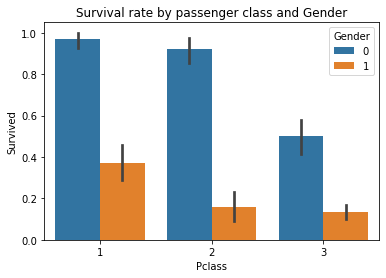

In [12]:
sns.barplot(data=df,x="Pclass",y="Survived",hue="Gender")
plt.title("Survival rate by passenger class and Gender")
plt.show()

In [13]:
# Split the data into training and testing sets
# 'train_size=0.8' means 80% of the data will be used for training and 20% for testing
# 'random_state=6' ensures the split is reproducible
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,random_state=6)

In [14]:
len(train_x)

712

In [15]:
len(test_y)

179

In [16]:
model=LogisticRegression() # Initialize the Logistic Regression model

In [17]:
model.fit(x,y)

LogisticRegression()

In [18]:
model.score(test_x,test_y) # Evaluate the model using the testing data

0.8547486033519553

In [24]:
Pclass=int(input("Pclass="))
Age=int(input("Age="))
Gender=int(input("Gender (1 for male and 0 for female)="))
ans=model.predict([[Pclass,Age,Gender]])

Pclass=1
Age=26
Gender (1 for male and 0 for female)=1


In [25]:
# Display the prediction result
if ans==1:
    print("Survived")
else:
    print("Did not Survived")

Survived
